In [1]:
library(tidyverse)
# define the link to the data - you can try this in your browser too.  Note that the URL ends in .txt.
dataurl="https://data.giss.nasa.gov/tmp/gistemp/STATIONS/tmp_USW00014733_14_0_1/station.txt"

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
#the next line tells the NASA site to create the temporary file
httr::GET("https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=USW00014733&ds=14&dt=1")

Response [https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=USW00014733&ds=14&dt=1]
  Date: 2022-09-11 22:44
  Status: 200
  Content-Type: text/html
  Size: 50.2 kB

<!DOCTYPE HTML><html lang="en">

<head>
<meta http-equiv="X-UA-Compatible" content="IE=edge;"/>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<link rel="stylesheet" type="text/css" href="https://www.giss.nasa.gov/css/cs...
<title>Data.GISS: 
GISS Surface Temperature Analysis (v4)
</title>
...

In [3]:
# the next lines download the data
temp=read_table(dataurl,
              skip=3, #skip the first line which has column names
              na="999.90", # tell R that 999.90 means missing in this dataset
              col_names = c("YEAR","JAN","FEB","MAR", # define column names 
                            "APR","MAY","JUN","JUL",  
                            "AUG","SEP","OCT","NOV",  
                            "DEC","DJF","MAM","JJA",  
                            "SON","metANN"))
# renaming is necessary becuase they used dashes ("-")
# in the column names and R doesn't like that.


── Column specification ────────────────────────────────────────────────────────
cols(
  YEAR = col_double(),
  JAN = col_double(),
  FEB = col_double(),
  MAR = col_double(),
  APR = col_double(),
  MAY = col_double(),
  JUN = col_double(),
  JUL = col_double(),
  AUG = col_double(),
  SEP = col_double(),
  OCT = col_double(),
  NOV = col_double(),
  DEC = col_double(),
  DJF = col_double(),
  MAM = col_double(),
  JJA = col_double(),
  SON = col_double(),
  metANN = col_double()
)



In [4]:
head(temp)

YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,DJF,MAM,JJA,SON,metANN
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1883,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,5.76,0.29,NA,NA,NA,NA,NA
1884,-8.55,-3.13,-1.67,4.15,11.32,19.08,18.35,19.77,18.32,10.74,2.86,-1.62,-3.80,4.60,19.07,10.64,7.63
1885,-6.86,-10.24,-6.83,4.39,11.91,15.86,20.98,18.11,15.31,9.63,4.45,-0.96,-6.24,3.16,18.32,9.80,6.26
1886,-5.81,-4.83,-0.34,8.04,11.76,17.22,19.84,19.30,17.01,10.88,2.90,-4.63,-3.87,6.49,18.79,10.26,7.92
1887,-5.87,-3.60,-2.39,4.42,17.21,19.52,24.43,20.46,15.36,9.03,3.70,-0.37,-4.70,6.41,21.47,9.36,8.14
1888,-7.66,-4.34,-3.13,4.14,12.56,18.67,20.49,20.36,15.36,7.58,4.90,-0.43,-4.12,4.52,19.84,9.28,7.38


In [5]:
dat = temp[,7:9]
years = temp[,1]
class(dat)

[1] "tbl_df"     "tbl"        "data.frame"

In [6]:
row_mean = apply(dat,1,mean)
JJA_mean = data.frame(row_mean)
JJA_years = cbind(years,JJA_mean)

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 9 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 2 row(s) containing missing values (geom_path)."


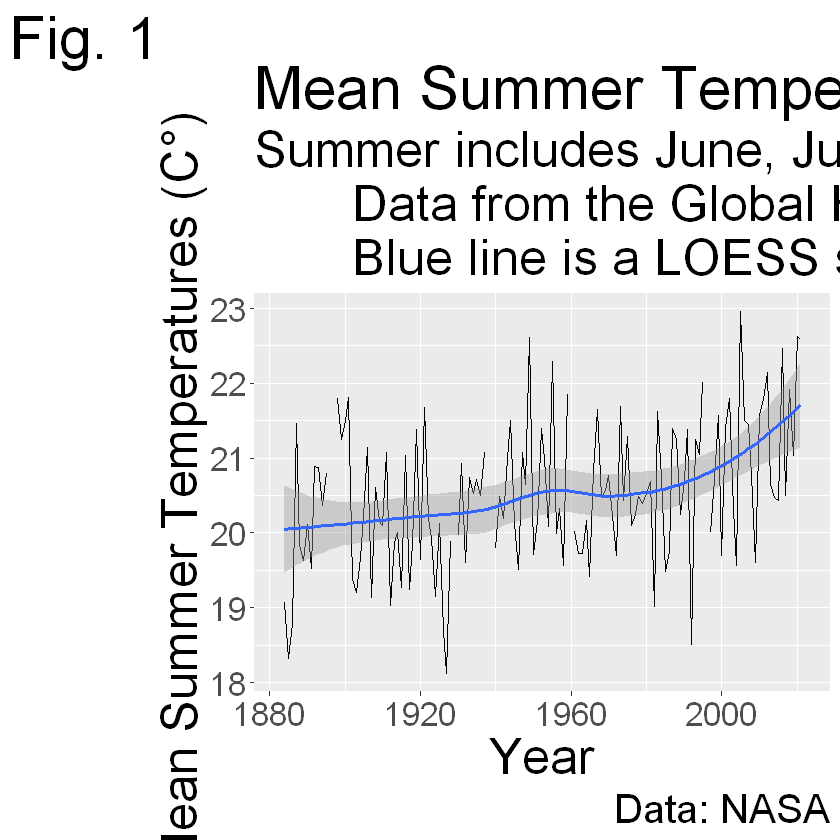

In [14]:
library(ggplot2)

ggplot(data = JJA_years, mapping = aes(x = YEAR, y = row_mean, group = 1)) + geom_line() + geom_smooth(method='loess') + labs(x = "Year", y = "Mean Summer Temperatures (C°)",
       title = "Mean Summer Temperatures in Buffalo, NY", #添加主标题
       subtitle = "Summer includes June, July, and August 
       Data from the Global Historical Climate Network 
       Blue line is a LOESS smooth", #添加次标题
       caption = "Data: NASA",#下备注
       tag = "Fig. 1") + theme(axis.text.x = element_text(size = 20),axis.text.y = element_text(size = 20),title = element_text(size = 30))

In [8]:
ggsave(
  filename = "Mean Summer Temperatures in Buffalo.png", # 保存的文件名称。通过后缀来决定生成什么格式的图片
  width = 17,             # 宽
  height = 9,            # 高
  units = "in",          # 单位
  dpi = 300              # 分辨率DPI
)

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 9 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 2 row(s) containing missing values (geom_path)."
